# SMA strategy backtesting

In [1]:
from backtest import SMABacktester as sma

In [2]:
smabt = sma.SMABacktester('EUR=', 42, 252, '2010-1-1', '2019-12-31')

In [3]:
type(smabt)

backtest.SMABacktester.SMABacktester

In [4]:
smabt.run_strategy()

(1.29, 0.45)

In [5]:
%%time
smabt.optimize_parameters((30, 50, 2),
                          (200, 300, 2))

Wall time: 1.91 s


(array([ 48., 238.]), 1.5)

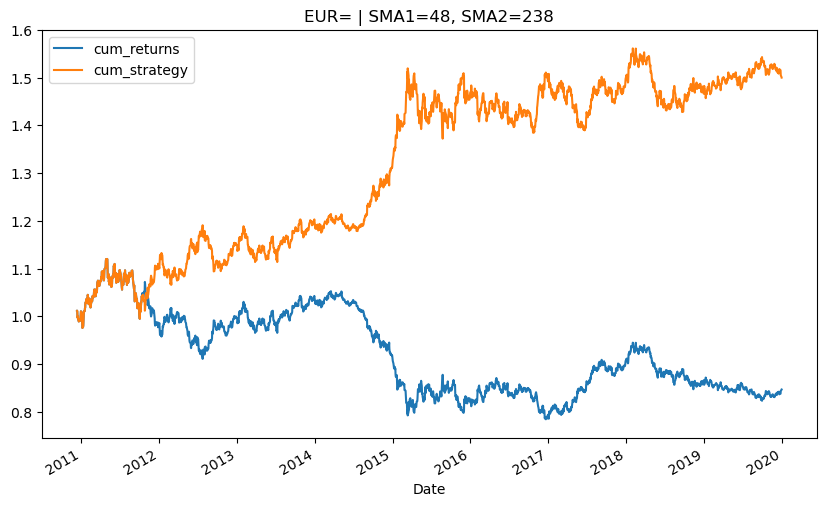

In [6]:
smabt.plot_results()

# Momentum strategy backtesting

In [7]:
from backtest import MomentumBacktester

In [8]:
mombt = MomentumBacktester.MomentumBacktester('XAU=', '2010-1-1', '2019-12-31', 10000, 0.0)
# takes the mean of the last three returns to generate signals for positioning
mombt.run_strategy(momentum=3)

(20797.87, 7395.53)

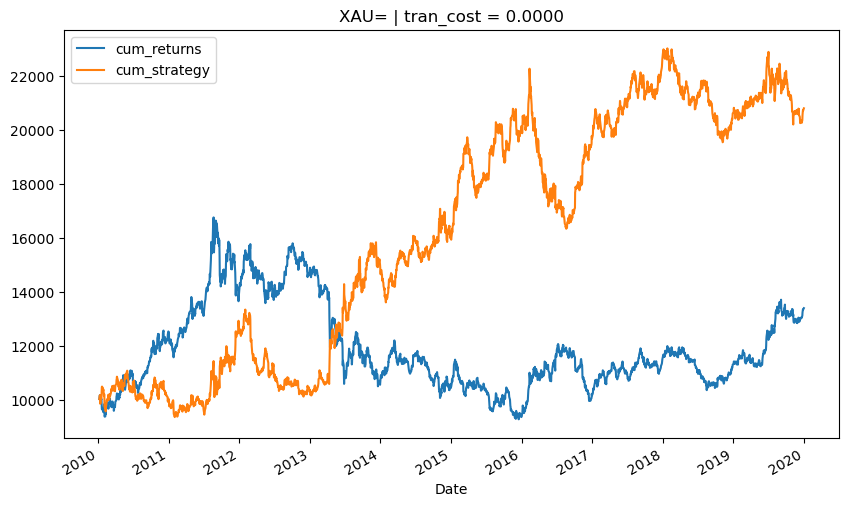

In [9]:
mombt.plot_results()

In [10]:
mombt = MomentumBacktester.MomentumBacktester('XAU=', '2010-1-1', '2019-12-31', 10000, 0.001)
mombt.run_strategy(momentum=3)
# even a small transaction cost will make the strategy fail due to high frequency of trading

(10749.4, -2652.93)

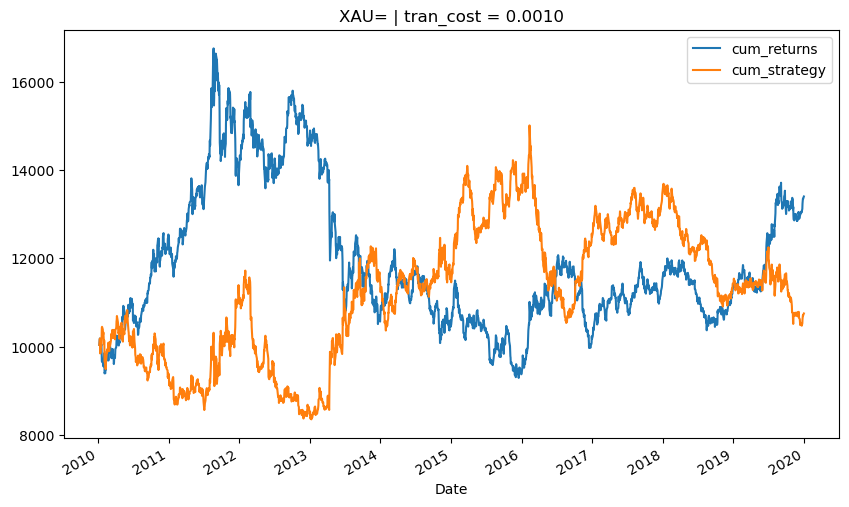

In [11]:
mombt.plot_results()

# Mean reversion strategy

In [12]:
#%load_ext autoreload
#%autoreload 2
from backtest import MeanRevBacktester

In [13]:
mrbt = MeanRevBacktester.MeanRevBacktester('GLD', '2010-1-1', '2019-12-31', 10000, 0.001)

In [14]:
mrbt.run_strategy(SMA=43, threshold=7.5)

(13542.15, 646.21)

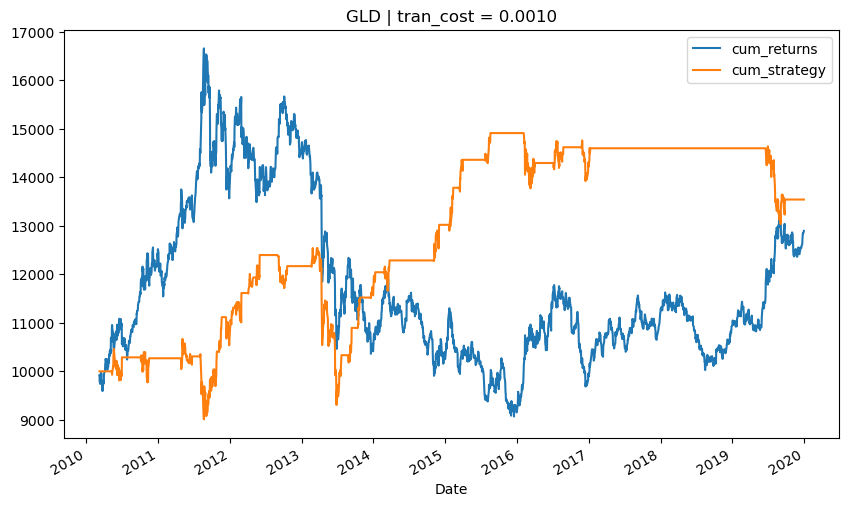

In [15]:
mrbt.plot_results()

# Linear Regression Backtesting

In [16]:
#%load_ext autoreload
#%autoreload 2
from timeseries import LinearRegBacktester

In [17]:
lrbt = LinearRegBacktester.LinearRegBacktester('EUR=', '2010-1-1', '2019-12-31', 10000, 0.0)

In [18]:
lrbt.run_strategy('2010-1-1', '2019-12-31', '2010-1-1', '2019-12-31', lags=5)

(17166.53, 9442.42)

In [19]:
lrbt.run_strategy('2010-1-1', '2017-12-31', '2018-1-1', '2019-12-31', lags=5)

(10160.86, 791.87)

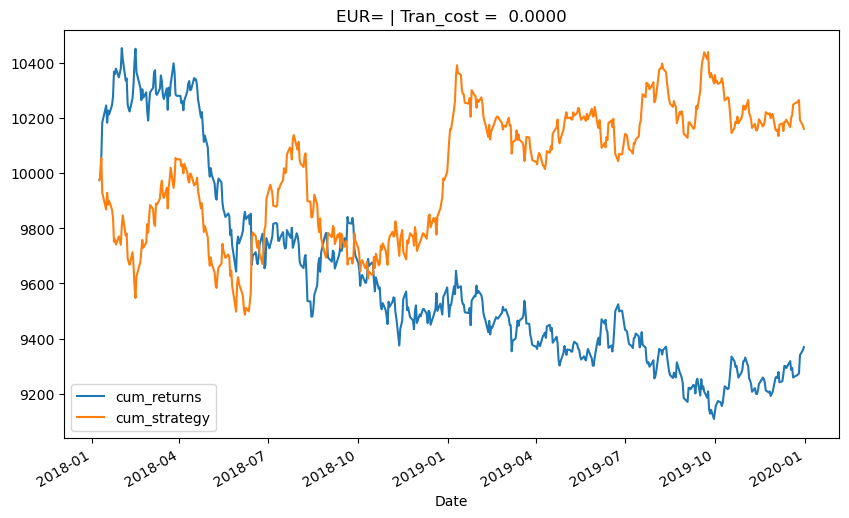

In [20]:
lrbt.plot_results()

In [21]:
lrbt = LinearRegBacktester.LinearRegBacktester('GDX', '2010-1-1', '2019-12-31', 10000, 0.002)

In [22]:
lrbt.run_strategy('2010-1-1', '2019-12-31', '2010-1-1', '2019-12-31', lags=7)

(23642.32, 17649.69)

In [23]:
lrbt.run_strategy('2010-1-1', '2014-12-31', '2015-1-1', '2019-12-31', lags=7)

(28513.35, 14888.41)

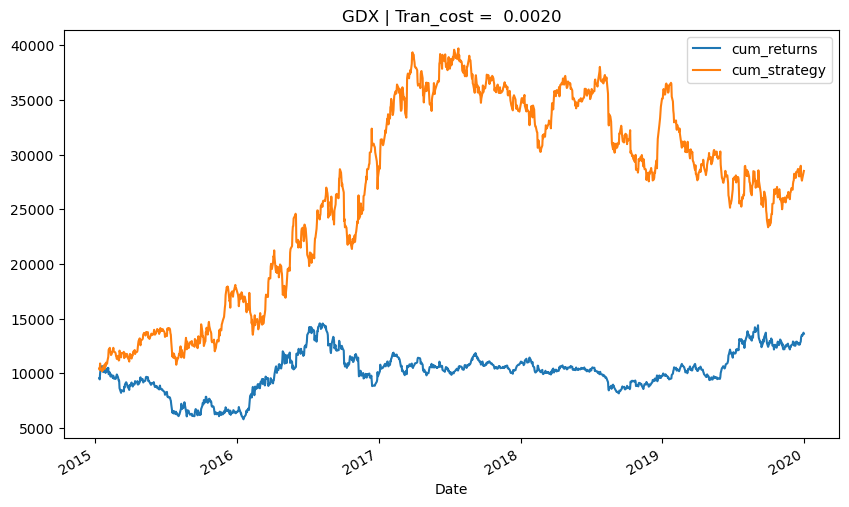

In [29]:
lrbt.plot_results()

# LinearRegression and LogisticRegression with scikit-learn

In [1]:
#%load_ext autoreload
#%autoreload 2
from timeseries import ScikitBacktester

### Logistic regression

In [2]:
scibt = ScikitBacktester.ScikitBacktester('EUR=',
                                   '2010-1-1', '2019-12-31',
                                   10000, 0.0, 'logistic')

In [3]:
scibt.run_strategy('2015-1-1', '2019-12-31',
                   '2015-1-1', '2019-12-31', lags=15)

(12192.18, 2189.5)

In [4]:
scibt.run_strategy('2016-1-1', '2018-12-31',
                   '2019-1-1', '2019-12-31', lags=15)

(10580.54, 729.93)

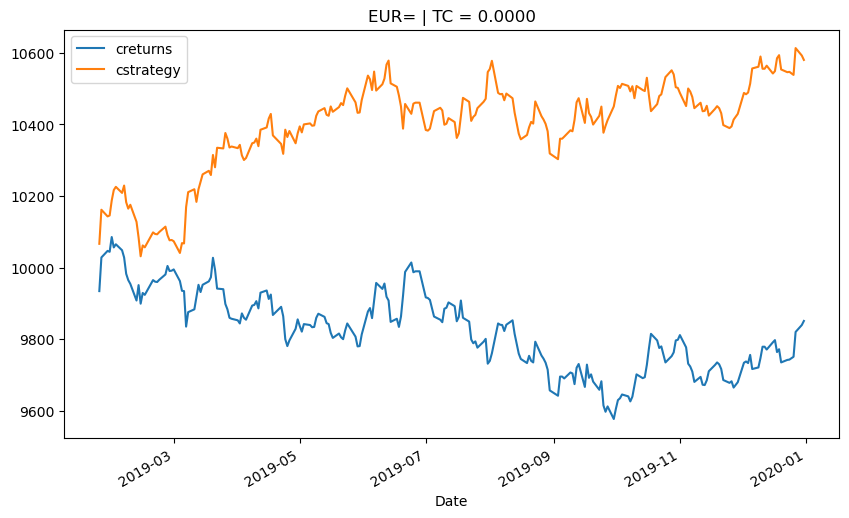

In [5]:
scibt.plot_results()

### With and without transaction costs

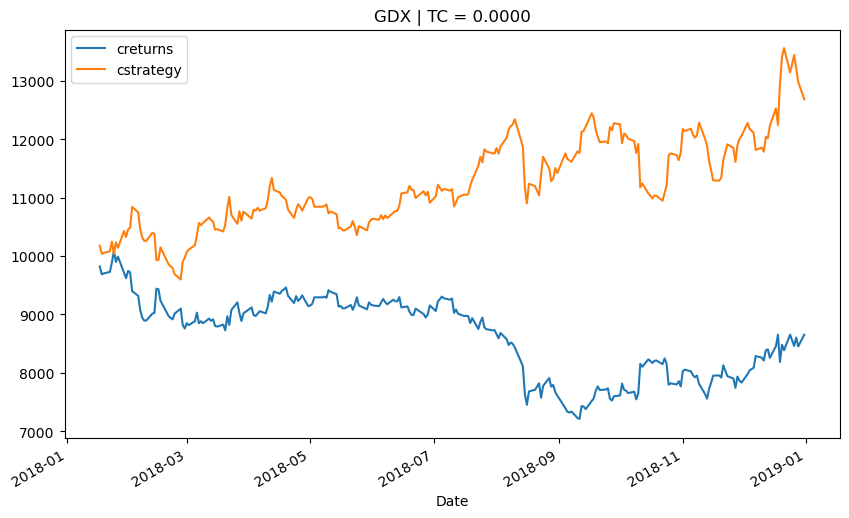

In [8]:
scibt = ScikitBacktester.ScikitBacktester('GDX',
                                   '2010-1-1', '2019-12-31',
                                   10000, 0.00, 'logistic')
scibt.run_strategy('2013-1-1', '2017-12-31',
                   '2018-1-1', '2018-12-31', lags=10)
scibt.plot_results()

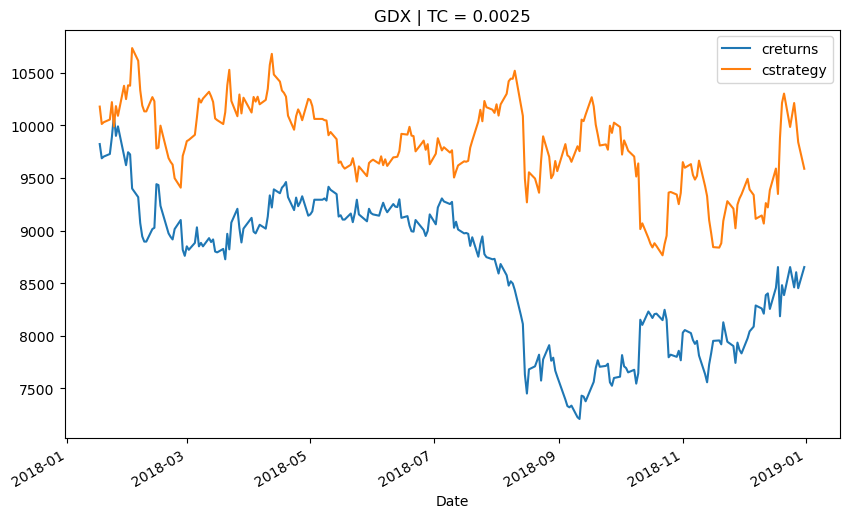

In [10]:
scibt = ScikitBacktester.ScikitBacktester('GDX',
                                   '2010-1-1', '2019-12-31',
                                   10000, 0.0025, 'logistic')
scibt.run_strategy('2013-1-1', '2017-12-31',
                   '2018-1-1', '2018-12-31', lags=10)
scibt.plot_results()